# Sequence model tutorial
* The following articles were referenced in the implementation of this notebook
    * https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf
* Tutrial for RNN, LSTM, GRU

# Import libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Generate toy data

(500,)


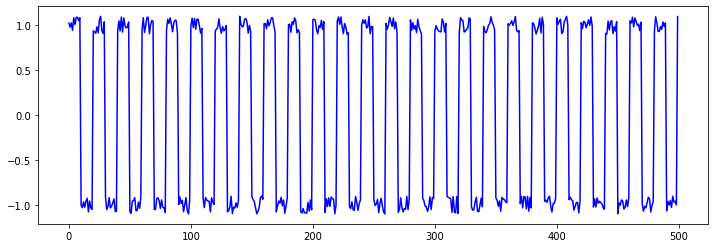

In [36]:
def square_wave(x, T=25):
    return signal.square(2.0 * np.pi * x * T)

def make_toy_problem(ampl=0.1):
    x = np.linspace(0, 1, 500)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return square_wave(x) + noise

row_data = make_toy_problem()
print(np.shape(row_data))

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(row_data)), row_data, color="b")
plt.show()

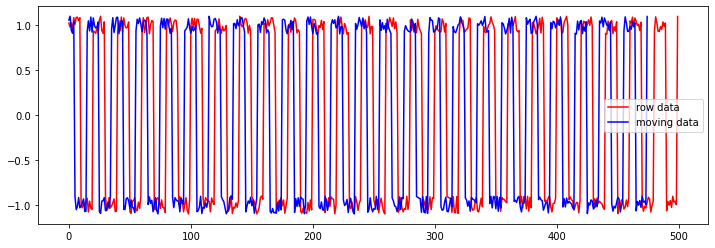

In [37]:
# f(0), f(1), f(2), f(3), f(4) -> label(1)
# f(1), f(2), f(3), f(4), f(5) -> label(2)
# f(2), f(3), f(4), f(5), f(6) -> label(3)

train_x, train_y = [], []
maxlen = 25

for i in range(len(row_data)-maxlen):
    train_x.append(row_data[i:i+maxlen]) # (95, 5)
    train_y.append(row_data[i+maxlen])  # (95)

train_x = np.array(train_x).reshape(len(train_x), maxlen, 1) # train_data  (95, 5, 1) 
train_y = np.array(train_y).reshape(len(train_x), 1)       # train_label (95, 1)

plt.figure(figsize=(12, 4))
plt.plot(range(0, len(row_data)), row_data, color="r", label="row data")
plt.plot(range(0, len(train_y)), train_y, color="b", label="moving data")
plt.legend()
plt.show()

# Construct model

In [38]:
timesteps = train_x.shape[1] # num of steps
print(timesteps)

N_OUTPUT = 1
N_HIDDEN = 300

model = Sequential()
# model.add(LSTM(N_HIDDEN, batch_input_shape=(None, timesteps, N_OUTPUT), return_sequences=False))
model.add(GRU(N_HIDDEN, batch_input_shape=(None, timesteps, N_OUTPUT), return_sequences=False))
# model.add(SimpleRNN(N_HIDDEN, batch_input_shape=(None, timesteps, N_OUTPUT), return_sequences=False))
model.add(Dense(N_OUTPUT))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))

25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [39]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)

model.fit(train_x, train_y,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Epoch 1/100
2/2 [==============================] - 2s 379ms/step - loss: 1.0303 - val_loss: 0.8883
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.8640 - val_loss: 0.7571
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.7423 - val_loss: 0.6291
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.6107 - val_loss: 0.5006
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.4829 - val_loss: 0.3882
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3706 - val_loss: 0.3293
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3281 - val_loss: 0.3913
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 0.3671 - val_loss: 0.3771
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 0.3493 - val_loss: 0.3346
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.3116 - val_loss: 0.3204
Epoch 11/100
2/2 [

# Predict

(25, 1)
25
(1,) [5.e-324]


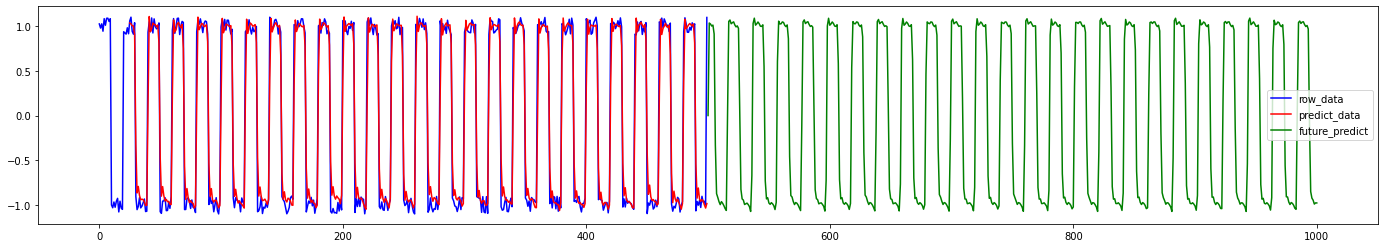

In [40]:
# estimate train_x itself
predicted = model.predict(train_x)

# estimate test_x (future value)
test_x = train_x[0]
time_length = test_x.shape[0] 
test_y = np.empty((1)) # variable for store test data

print(np.shape(test_x))
print(time_length)
print(np.shape(test_y), test_y)

for i in range(500):
    test_data = np.reshape(test_x, (1, time_length, 1)) # (1, 25, 1)
    batch_predict = model.predict(test_data) # (1, 1)

    test_x = np.delete(test_x, 0) # (24,)
    test_x = np.append(test_x, batch_predict) # (25,)
    
    test_y = np.append(test_y, batch_predict) # (2,)

plt.figure(figsize=(24, 4))
plt.plot(range(0, len(row_data)), row_data, color="b", label="row_data")
plt.plot(range(25, len(predicted)+25), predicted, color="r", label="predict_data")
plt.plot(range(0+len(row_data), len(test_y)+len(row_data)), test_y, color="g", label="future_predict")
plt.legend()
plt.show()